In [1]:
from skimage import io,data
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
file1 = open("11.txt")
# 按行读取
contents = file1.readlines()
 
# 数组
arr1 = []
 
for item in contents:
    # 清除换行、空格
    content = item.strip()
    # 按照","分割
    temp = content.split(",")
    arr1.append(temp)
print(arr1)

[['956', '853', '1160', '853', '1160', '877', '956', '878'], ['1198', '856', '1378', '856', '1378', '894', '1198', '893'], ['935', '996', '1022', '996', '1021', '1018', '935', '1018'], ['1192', '902', '1285', '902', '1285', '928', '1192', '929'], ['263', '422', '287', '423', '286', '518', '262', '518'], ['323', '730', '433', '730', '433', '763', '323', '763'], ['83', '532', '126', '532', '124', '802', '81', '802'], ['1189', '968', '1237', '967', '1237', '989', '1189', '989'], ['292', '397', '315', '397', '316', '456', '292', '457'], ['1017', '901', '1118', '901', '1118', '926', '1017', '925'], ['40', '505', '98', '505', '98', '808', '39', '808'], ['1253', '968', '1314', '968', '1314', '987', '1253', '987'], ['222', '461', '245', '461', '245', '513', '222', '514'], ['562', '213', '604', '213', '604', '237', '562', '237'], ['232', '946', '509', '945', '509', '975', '232', '975'], ['951', '463', '974', '463', '973', '500', '951', '500'], ['467', '604', '533', '603', '533', '628', '467', '

In [3]:
file2 = open("22.txt")
# 按行读取
contents = file2.readlines()
 
# 数组
arr2 = []
 
for item in contents:
    # 清除换行、空格
    content = item.strip()
    # 按照","分割
    temp = content.split(",")
    arr2.append(temp)
print(arr2)

[['55', '584', '93', '584', '91', '831', '54', '831'], ['195', '955', '555', '953', '555', '983', '196', '986'], ['878', '610', '1011', '611', '1011', '637', '878', '637'], ['976', '858', '1172', '857', '1172', '883', '976', '884'], ['273', '448', '294', '448', '293', '523', '272', '523'], ['88', '561', '120', '561', '121', '811', '90', '811'], ['763', '399', '787', '399', '786', '451', '763', '451'], ['327', '735', '440', '735', '440', '770', '327', '770'], ['1025', '905', '1130', '906', '1129', '932', '1025', '931'], ['265', '783', '516', '782', '517', '817', '265', '817'], ['572', '609', '628', '609', '628', '635', '572', '635'], ['1249', '72', '1325', '72', '1325', '111', '1249', '111'], ['943', '1001', '1029', '1001', '1029', '1025', '943', '1025'], ['1200', '907', '1294', '906', '1294', '932', '1200', '932'], ['1209', '861', '1378', '860', '1378', '897', '1210', '897'], ['335', '313', '358', '313', '359', '359', '335', '359'], ['393', '994', '453', '994', '453', '1020', '392', '1

In [4]:
height1=int(arr1[0][0])#小
height2=int(arr1[0][2])#大

width1=int(arr1[0][1])#小
width2=int(arr1[0][5])#大
print(height1,height2)
print(width1,width2)

956 1160
853 877


In [5]:
#共有100行
print (len(arr2)) 

100


In [16]:
found=[]
found=arr2[0]
found

['55', '584', '93', '584', '91', '831', '54', '831']

In [20]:
2**3

8

3


D:\Python3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
D:\Python3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


14
12


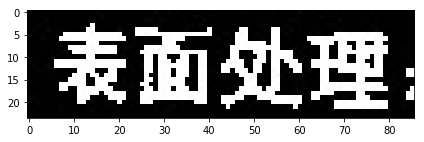

In [46]:
#遍历第一张图中每个bounding box的左上角点的坐标记为X
#以X为中心，做一个边长为42像素的正方形REC
#在第二张图中判断是否存在左上角Y在REC范围内的bounding box
area=35#像素值
found_column=0#储存匹配到的bounding box在txt文件中的列数
for i in range(3):#遍历第一张图中的bounding box
    count=0#计数
    for j in range(len(arr2)):#遍历第二张图中的bounding box
    #最大像素偏移量为10
    #对bounding box的某一点10*10像素的区域内找相同位置的点
        if(int(arr2[j][0])-area)<int(arr1[i][0])<(int(arr2[j][0])+area)and(int(arr2[j][1])-area)<int(arr1[i][1])<(int(arr2[j][1])+area):
            if count==0:#如果这是第一个满足条件的点，让found_column记录它
                found_column=j
            elif count>0:#如果这不是第一个满足条件的点，进行筛选，选择离它最近的点
                if (int(arr2[found_column][0])-int(arr1[i][0]))**2+(int(arr2[found_column][1])-int(arr1[i][1]))**2 > (int(arr2[j][0])-int(arr1[i][0]))**2+(int(arr2[j][1])-int(arr1[i][1]))**2:
                    found_column=j
                  
            count=count+1#计数，筛选在限定范围内，满足上式条件的bounding box
    print(found_column)#在这里执行每一步操作，缩进距离和第一个for相同
    height1=int(arr2[found_column][0])#小
    height2=int(arr2[found_column][2])#大
    width1=int(arr2[found_column][1])#小
    width2=int(arr2[found_column][5])#大
    img=cv2.imread("result\\11.jpg")
    roi=img[width1:width2,height1:height2,:]
    #roi=img[80:180,100:200,:]
    io.imshow(roi)
    img.shape

D:\Python3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
D:\Python3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


(1080, 1484, 3)

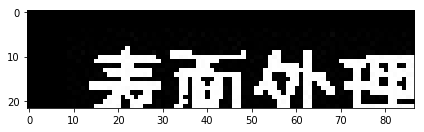

In [48]:
    height1=int(arr1[i][0])#小
    height2=int(arr1[i][2])#大
    width1=int(arr1[i][1])#小
    width2=int(arr1[i][5])#大
    img=cv2.imread("result\\11.jpg")
    roi=img[width1:width2,height1:height2,:]
    #roi=img[80:180,100:200,:]
    io.imshow(roi)
    img.shape

In [22]:
a=1
b=2
if a<b:
    print(a)

1


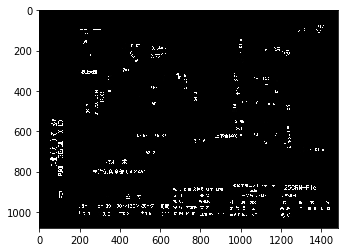

In [18]:
img=cv2.imread("result//22.jpg")
plt.imshow(img)

In [19]:
'''
for i in range(20):
    height1=int(arr[i][0])#小
    height2=int(arr[i][2])#大
    width1=int(arr[i][1])#小
    width2=int(arr[i][5])#大
    #print(height1,height2)
    cv2.rectangle(img,(height1,width2),(height2,width1),(0,255,0),3)
    cv2.imwrite("result\\%d.jpg"%(i),img)
    #print("你好%d"%(a))
    #cv2.resizeWindow("enhanced", 640, 480);
#cv2.imshow("Image",img)
plt.imshow(img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
'''

'\nfor i in range(20):\n    height1=int(arr[i][0])#小\n    height2=int(arr[i][2])#大\n    width1=int(arr[i][1])#小\n    width2=int(arr[i][5])#大\n    #print(height1,height2)\n    cv2.rectangle(img,(height1,width2),(height2,width1),(0,255,0),3)\n    cv2.imwrite("result\\%d.jpg"%(i),img)\n    #print("你好%d"%(a))\n    #cv2.resizeWindow("enhanced", 640, 480);\n#cv2.imshow("Image",img)\nplt.imshow(img)\n#cv2.waitKey(0)\n#cv2.destroyAllWindows()\n'

D:\Python3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
D:\Python3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


(1080, 1484, 3)

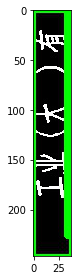

In [21]:

img=cv2.imread("result\\11.jpg")
roi=img[width1:width2,height1:height2,:]
#roi=img[80:180,100:200,:]
io.imshow(roi)
a=1
img.shape